In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/softwareWCU/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv"
df=pd.read_csv(url) # Reload df to ensure a clean state

In [ ]:
df.head(14)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
df.tail(14)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Handling Missing Value

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


Select categorical columns

In [ ]:
print(df.select_dtypes(include=['object']).columns)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


Convert Yes / No Columns by using Label Encoding into 0 and 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

yes_no_cols = ['mainroad', 'guestroom', 'basement',
'hotwaterheating', 'airconditioning', 'prefarea']


for col in yes_no_cols:
    df[col] = df[col].astype(str).str.lower().str.strip().map({'yes': 1, 'no': 0})

convert furnishingstatus  into bool by using One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


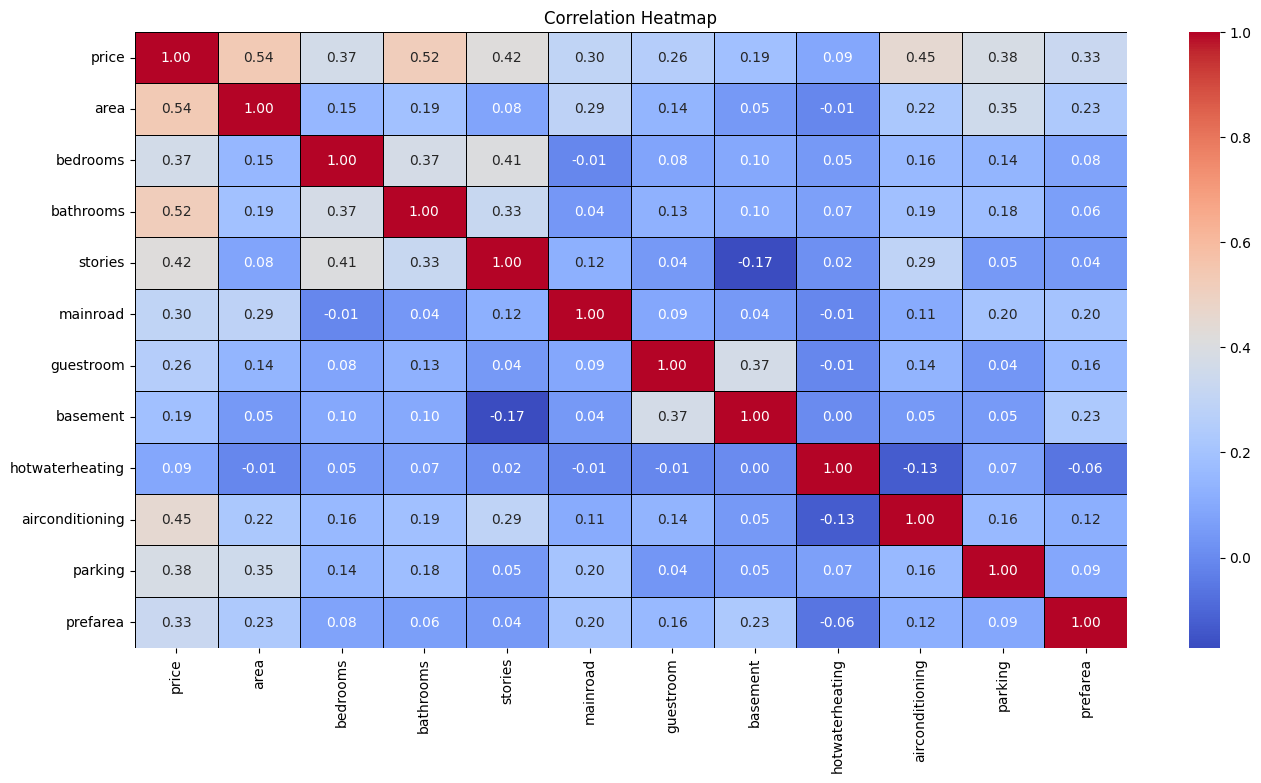

In [ ]:

plt.figure(figsize=(16,8))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

Feature Selection

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_area = df[['area']]
y_price = df['price']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_area, y_price, test_size=0.2, random_state=42
)

linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)

y_pred_lr = linear_model.predict(X_test_lr)

print("Linear Regression R²:", r2_score(y_test_lr, y_pred_lr))

Linear Regression R²: 0.27287851871974644


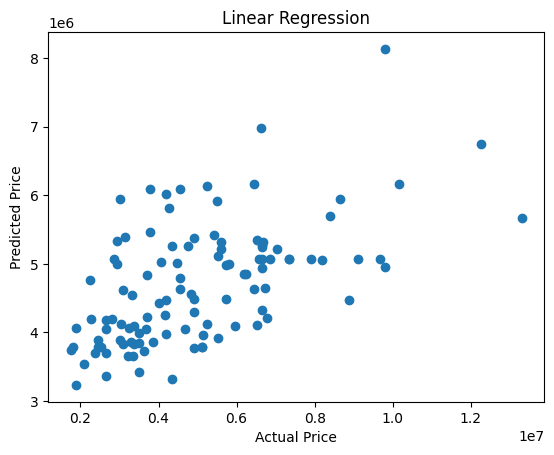

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.show()


Multiple Linear Regression

In [ ]:
from sklearn.metrics import r2_score

multi_linear_model = LinearRegression()
multi_linear_model.fit(x_train, y_train)

y_pred_mlr = multi_linear_model.predict(x_test)

print("Multiple Linear Regression R²:", r2_score(y_test, y_pred_mlr))

Multiple Linear Regression R²: 0.6529242642153185


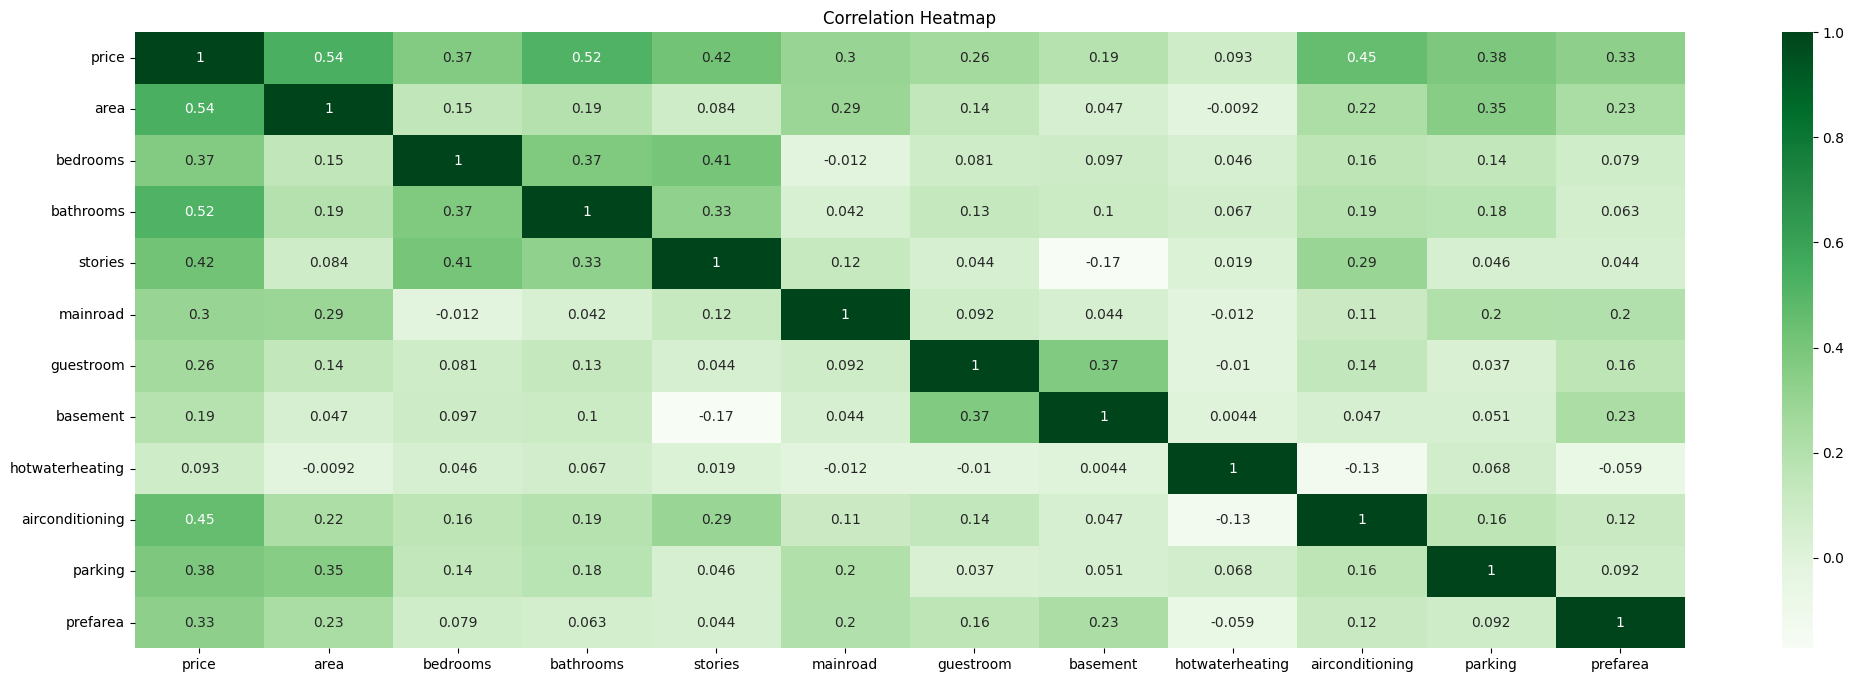

In [ ]:
import seaborn as sns

plt.figure(figsize=(25,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))

Polynomial Regression R²: 0.6208412813618335


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_pred_poly = poly_model.predict(poly.transform(x_test))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

y_pred_knn = knn_model.predict(x_test_scaled)

print("KNN Regression R²:", r2_score(y_test, y_pred_knn))

KNN Regression R²: 0.6134197563748457


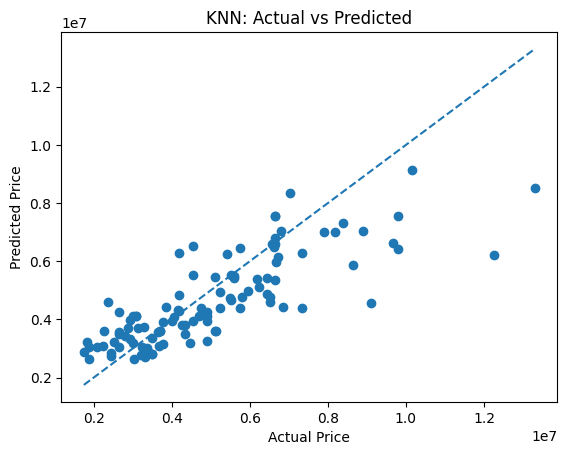

In [ ]:
import matplotlib.pyplot as plt

y_pred = knn_model.predict(x_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN: Actual vs Predicted")
plt.show()

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_scaled, y_train)

y_pred_dt = dt_model.predict(x_test_scaled)

print("Decision Tree Regression R²:", r2_score(y_test, y_pred_dt))

Decision Tree Regression R²: 0.4771459275854347


Number of features in model: 13
Feature names list: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
Length of feature names list: 13


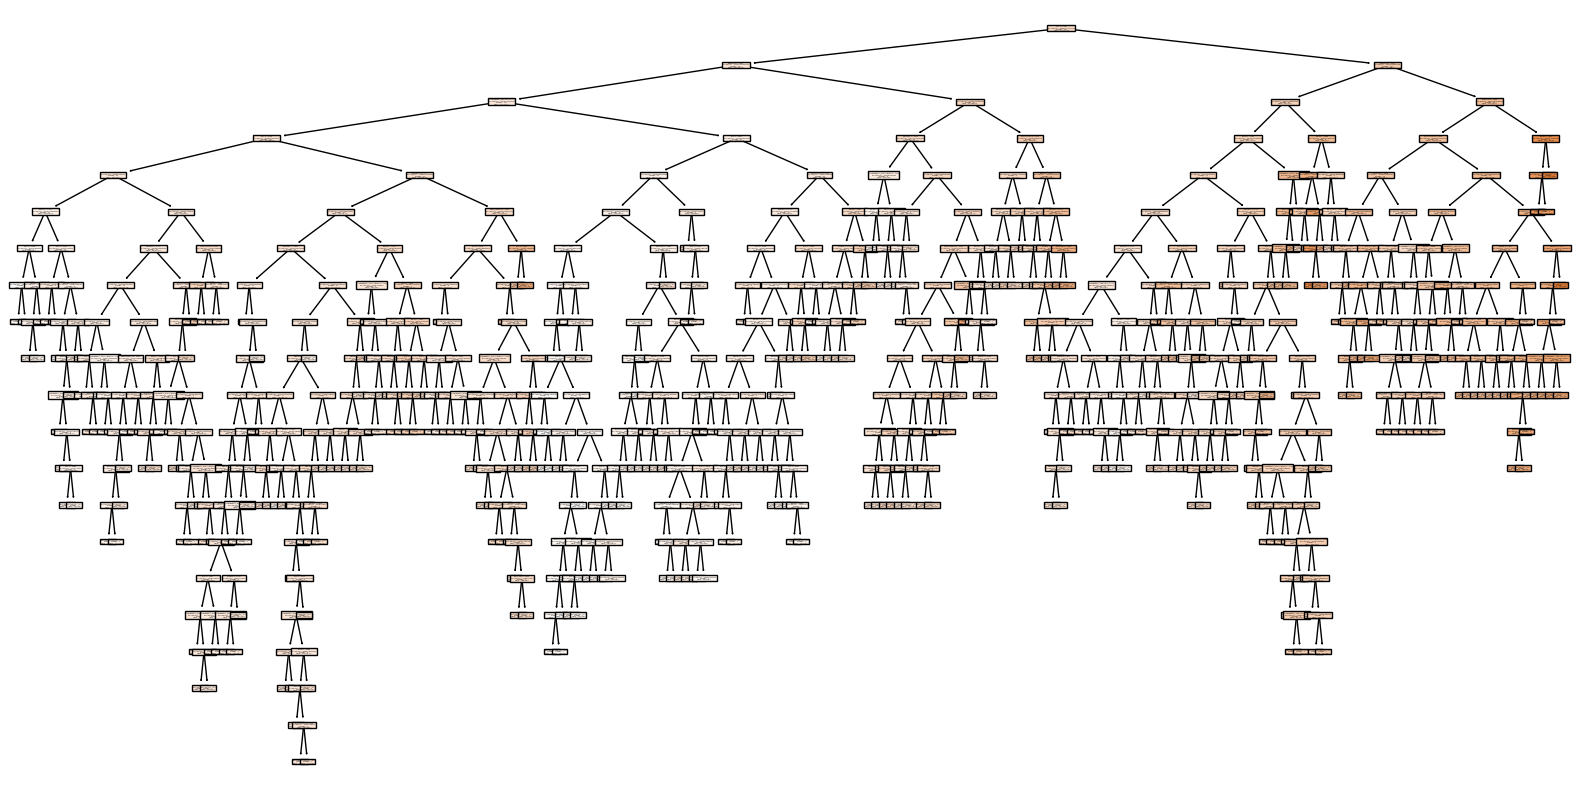

In [ ]:
from sklearn.tree import plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

# Re-initialize and re-fit the model to ensure it's in a consistent state
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_scaled, y_train)
num_features_model = dt_model.n_features_in_
print(f"Number of features in model: {num_features_model}")

feature_names_to_plot = x_train.columns.tolist()
print(f"Feature names list: {feature_names_to_plot}")
print(f"Length of feature names list: {len(feature_names_to_plot)}")

plot_tree(
    dt_model,
    feature_names=feature_names_to_plot,
    filled=True
)
plt.show()

Create input data for prediction

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
final_model = DecisionTreeRegressor(random_state=42)
final_model.fit(x_train_scaled, y_train)

new_house_data = {
    'area': [7000],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [3],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus_semi-furnished': [0],
    'furnishingstatus_unfurnished': [0]
}

new_house = pd.DataFrame(new_house_data)

# Scale the new house data using the same scaler object used for training
new_house_scaled = scaler.transform(new_house)

predicted_price = final_model.predict(new_house_scaled)
print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 9310000.00
